Imports


In [3]:
import os
import json
import pytesseract
from tqdm import tqdm
from PIL import Image
import ollama # 0.5.6

Data

In [2]:
import os

def gather_files(base_path):
    md_files = []
    mdx_files = []
    ipynb_files = []
    png_files = []

    for root, dirs, files in os.walk(base_path):
        for file in files:
            full_path = os.path.join(root, file)
            if file.endswith(".md"):
                md_files.append(full_path)
            elif file.endswith(".mdx"):
                mdx_files.append(full_path)
            elif file.endswith(".ipynb"):
                ipynb_files.append(full_path)
            elif file.endswith(".png"):
                png_files.append(full_path)

    return md_files, mdx_files, ipynb_files, png_files

base_path = "./Prompt-Engineering-Guide"
md_files, mdx_files, ipynb_files, png_files = gather_files(base_path)

print("MD files:", len(md_files))
print("MDX files:", len(mdx_files))
print("IPYNB files:", len(ipynb_files))
print("PNG files:", len(png_files))


MD files: 11
MDX files: 1088
IPYNB files: 12
PNG files: 157


In [4]:
md_files[0]

'./Prompt-Engineering-Guide\\LICENSE.md'

In [5]:
def read_markdown_file(path):
    with open(path, 'r', encoding='utf-8') as f:
        return f.read()

In [ ]:
md_contents = []
all_md_files = md_files + mdx_files

for file_path in all_md_files:
    md_content = read_markdown_file(file_path)
    md_contents.append(md_content)
    print(f"--- Content of {file_path} ---")
    print(md_content[:300])

--- Content of ./Prompt-Engineering-Guide\LICENSE.md ---
MIT License

Copyright (c) 2022 DAIR.AI

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge
--- Content of ./Prompt-Engineering-Guide\README.md ---
# Prompt Engineering Guide

Prompt engineering is a relatively new discipline for developing and optimizing prompts to efficiently use language models (LMs) for a wide variety of applications and research topics. Prompt engineering skills help to better understand the capabilities and limitations of
--- Content of ./Prompt-Engineering-Guide\guides\prompts-advanced-usage.md ---
# Advanced Prompting
By this point, it should be obvious that it helps to improve prompts to get better results on different tasks. That's the whole idea behind prompt engineering. 

While those examples we

In [7]:
def read_ipynb_file(path):
    with open(path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    text_content = []
    for cell in data.get('cells', []):
        if cell.get('cell_type') == 'markdown':
            text_content.append(" ".join(cell.get('source', [])))
        elif cell.get('cell_type') == 'code':
            text_content.append(" ".join(cell.get('source', [])))
    return "\n".join(text_content)

In [8]:
ipynb_contents = []
for notebook in ipynb_files:
    py_content = read_ipynb_file(notebook)
    ipynb_contents.append(py_content)
  #  print(f"--- Content of {notebook} ---")
 #   print(py_content[:300])

In [10]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
png_contents = []
def extract_text_from_png(path):
    """
    Чете изображението от посочения път (path) и 
    извлича текст чрез Tesseract OCR.
    """
    img = Image.open(path)
    text = pytesseract.image_to_string(img)
    return text


for png_path in tqdm(png_files, desc="Processing PNG files"):
    png_content = extract_text_from_png(png_path)

    print(f"--- OCR Content from {png_path} ---")
    png_contents.append(png_content)
  ##  print(png_content[:300])  
  ##  print("--- END ---\n");

Processing PNG files:   1%|          | 1/157 [00:01<02:44,  1.05s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\active-prompt.png ---


Processing PNG files:   1%|▏         | 2/157 [00:01<02:12,  1.17it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\ape-zero-shot-cot.png ---


Processing PNG files:   2%|▏         | 3/157 [00:03<02:52,  1.12s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\APE.png ---


Processing PNG files:   3%|▎         | 4/157 [00:04<03:05,  1.21s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\ART.png ---


Processing PNG files:   3%|▎         | 5/157 [00:06<03:35,  1.42s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\ART2.png ---


Processing PNG files:   4%|▍         | 6/157 [00:08<04:00,  1.59s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\auto-cot.png ---


Processing PNG files:   4%|▍         | 7/157 [00:09<04:05,  1.63s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\chatgpt-1.png ---


Processing PNG files:   5%|▌         | 8/157 [00:11<03:56,  1.59s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\chatgpt-classic.png ---


Processing PNG files:   6%|▌         | 9/157 [00:12<03:25,  1.39s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\cot.png ---


Processing PNG files:   6%|▋         | 10/157 [00:14<04:11,  1.71s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\dan-1.png ---


Processing PNG files:   7%|▋         | 11/157 [00:15<03:35,  1.48s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\flan-1.png ---


Processing PNG files:   8%|▊         | 12/157 [00:17<03:38,  1.51s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\flan-10.png ---


Processing PNG files:   8%|▊         | 13/157 [00:18<03:32,  1.48s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\flan-11.png ---


Processing PNG files:   9%|▉         | 14/157 [00:19<02:54,  1.22s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\flan-2.png ---


Processing PNG files:  10%|▉         | 15/157 [00:20<02:31,  1.07s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\flan-3.png ---


Processing PNG files:  10%|█         | 16/157 [00:20<02:12,  1.06it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\flan-4.png ---


Processing PNG files:  11%|█         | 17/157 [00:22<02:40,  1.14s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\flan-5.png ---


Processing PNG files:  11%|█▏        | 18/157 [00:23<02:19,  1.00s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\flan-6.png ---


Processing PNG files:  12%|█▏        | 19/157 [00:24<02:19,  1.01s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\flan-7.png ---


Processing PNG files:  13%|█▎        | 20/157 [00:25<02:27,  1.08s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\flan-8.png ---


Processing PNG files:  13%|█▎        | 21/157 [00:26<02:20,  1.03s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\flan-9.png ---


Processing PNG files:  14%|█▍        | 22/157 [00:26<02:07,  1.06it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\gen-knowledge.png ---


Processing PNG files:  15%|█▍        | 23/157 [00:27<01:57,  1.15it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\gpt4-1.png ---


Processing PNG files:  15%|█▌        | 24/157 [00:28<02:11,  1.01it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\gpt4-2.png ---


Processing PNG files:  16%|█▌        | 25/157 [00:29<02:04,  1.06it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\gpt4-3.png ---


Processing PNG files:  17%|█▋        | 26/157 [00:30<02:07,  1.03it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\gpt4-4.png ---


Processing PNG files:  17%|█▋        | 27/157 [00:31<02:07,  1.02it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\gpt4-5.png ---


Processing PNG files:  18%|█▊        | 28/157 [00:32<01:55,  1.12it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\gpt4-6.png ---


Processing PNG files:  18%|█▊        | 29/157 [00:33<01:58,  1.08it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\gpt4-7.png ---


Processing PNG files:  19%|█▉        | 30/157 [00:34<02:02,  1.03it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\gpt4-8.png ---


Processing PNG files:  20%|█▉        | 31/157 [00:36<02:44,  1.30s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\gpt4-game-simulator.png ---


Processing PNG files:  20%|██        | 32/157 [00:37<02:19,  1.12s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\introduction.png ---


Processing PNG files:  21%|██        | 33/157 [00:38<02:32,  1.23s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\llama-1.png ---


Processing PNG files:  22%|██▏       | 34/157 [00:40<02:45,  1.34s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\mistral-7B-1.png ---


Processing PNG files:  22%|██▏       | 35/157 [00:41<02:27,  1.21s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\mistral-7B-2.png ---


Processing PNG files:  23%|██▎       | 36/157 [00:42<02:22,  1.18s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\multimodal-cot.png ---


Processing PNG files:  24%|██▎       | 37/157 [00:43<02:32,  1.27s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\pal.png ---


Processing PNG files:  24%|██▍       | 38/157 [00:45<02:38,  1.33s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\rag.png ---


Processing PNG files:  25%|██▍       | 39/157 [00:47<02:51,  1.45s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\react.png ---


Processing PNG files:  25%|██▌       | 40/157 [00:48<02:29,  1.28s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\TOT.png ---


Processing PNG files:  26%|██▌       | 41/157 [00:48<02:09,  1.11s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\TOT2.png ---


Processing PNG files:  27%|██▋       | 42/157 [00:49<01:58,  1.03s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\TOT3.png ---


Processing PNG files:  27%|██▋       | 43/157 [00:50<02:07,  1.11s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\zero-cot.png ---


Processing PNG files:  28%|██▊       | 44/157 [00:51<01:47,  1.05it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\agents\agent-components.png ---


Processing PNG files:  29%|██▊       | 45/157 [00:52<01:33,  1.20it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\agents\agent-framework.png ---


Processing PNG files:  29%|██▉       | 46/157 [00:53<01:42,  1.08it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\agents\agentbench.png ---


Processing PNG files:  30%|██▉       | 47/157 [00:54<01:41,  1.09it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\agents\autogen.png ---


Processing PNG files:  31%|███       | 48/157 [00:55<02:05,  1.15s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\agents\chemcrow.png ---


Processing PNG files:  31%|███       | 49/157 [00:56<01:55,  1.07s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\agents\hugginggpt.png ---


Processing PNG files:  32%|███▏      | 50/157 [00:57<01:52,  1.05s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\agents\task-decomposition.png ---


Processing PNG files:  32%|███▏      | 51/157 [01:00<02:39,  1.50s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\claude\claude-benchmark.png ---


Processing PNG files:  33%|███▎      | 52/157 [01:01<02:31,  1.44s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\claude\claude-vision.png ---


Processing PNG files:  34%|███▍      | 53/157 [01:02<02:22,  1.37s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\code-generation\chat-mode.png ---


Processing PNG files:  34%|███▍      | 54/157 [01:03<02:18,  1.34s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\gemini\chart.png ---


Processing PNG files:  35%|███▌      | 55/157 [01:05<02:24,  1.41s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\gemini\chat-1.png ---


Processing PNG files:  36%|███▌      | 56/157 [01:07<02:29,  1.48s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\gemini\extract-table.png ---


Processing PNG files:  36%|███▋      | 57/157 [01:09<02:42,  1.63s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\gemini\galactica-2.png ---


Processing PNG files:  37%|███▋      | 58/157 [01:11<02:47,  1.69s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\gemini\galactica-chat.png ---


Processing PNG files:  38%|███▊      | 59/157 [01:13<03:19,  2.04s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\gemini\galactica.png ---


Processing PNG files:  38%|███▊      | 60/157 [01:15<03:15,  2.02s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\gemini\gemini-1.png ---


Processing PNG files:  39%|███▉      | 61/157 [01:17<03:15,  2.04s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\gemini\gemini-2.png ---


Processing PNG files:  39%|███▉      | 62/157 [01:18<02:42,  1.71s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\gemini\gemini-3.png ---


Processing PNG files:  40%|████      | 63/157 [01:19<02:12,  1.41s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\gemini\gemini-6.png ---


Processing PNG files:  41%|████      | 64/157 [01:20<01:53,  1.22s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\gemini\gemini-7.png ---


Processing PNG files:  41%|████▏     | 65/157 [01:22<02:14,  1.46s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\gemini\gemini-8.png ---


Processing PNG files:  42%|████▏     | 66/157 [01:22<01:46,  1.17s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\gemini\gemini-architecture.png ---


Processing PNG files:  43%|████▎     | 67/157 [01:24<01:44,  1.16s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\gemini\gemini-few-shot-2.png ---


Processing PNG files:  43%|████▎     | 68/157 [01:25<01:39,  1.12s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\gemini\gemini-few-shot.png ---


Processing PNG files:  44%|████▍     | 69/157 [01:26<01:58,  1.35s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\gemini\gemini-pro-results.png ---


Processing PNG files:  45%|████▍     | 70/157 [01:29<02:23,  1.65s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\gemini\gemini-result.png ---


Processing PNG files:  45%|████▌     | 71/157 [01:30<02:01,  1.41s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\gemini\gemini-retrieval.png ---


Processing PNG files:  46%|████▌     | 72/157 [01:30<01:45,  1.24s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\gemini\jax.png ---


Processing PNG files:  46%|████▋     | 73/157 [01:31<01:30,  1.07s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\gemini\kalamang.png ---


Processing PNG files:  47%|████▋     | 74/157 [01:33<01:48,  1.31s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\gemini\pe-guide.png ---


Processing PNG files:  48%|████▊     | 75/157 [01:34<01:42,  1.25s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\gemini\prompt-webqa-1.png ---


Processing PNG files:  48%|████▊     | 76/157 [01:36<01:51,  1.38s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\gemini\prompt-webqa-2.png ---


Processing PNG files:  49%|████▉     | 77/157 [01:38<02:08,  1.61s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\gemini-advanced\chart-explanation.png ---


Processing PNG files:  50%|████▉     | 78/157 [01:39<01:55,  1.46s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\gemini-advanced\chart.png ---


Processing PNG files:  50%|█████     | 79/157 [01:40<01:33,  1.20s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\gemini-advanced\html.png ---


Processing PNG files:  51%|█████     | 80/157 [01:41<01:41,  1.32s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\gemini-advanced\interleaving.png ---


Processing PNG files:  52%|█████▏    | 81/157 [01:42<01:31,  1.20s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\gemini-advanced\math.png ---


Processing PNG files:  52%|█████▏    | 82/157 [01:45<02:01,  1.62s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\gemini-advanced\physical-reasoning.png ---


Processing PNG files:  53%|█████▎    | 83/157 [01:46<01:52,  1.52s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\gemini-advanced\prime.png ---


Processing PNG files:  54%|█████▎    | 84/157 [01:48<01:53,  1.55s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\gemma\benchmarks.png ---


Processing PNG files:  54%|█████▍    | 85/157 [01:48<01:32,  1.28s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\gemma\capabilities.png ---


Processing PNG files:  55%|█████▍    | 86/157 [01:49<01:18,  1.10s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\gemma\control-tokens.png ---


Processing PNG files:  55%|█████▌    | 87/157 [01:50<01:12,  1.03s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\gemma\safety-2.png ---


Processing PNG files:  56%|█████▌    | 88/157 [01:51<01:06,  1.04it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\gemma\safety.png ---


Processing PNG files:  57%|█████▋    | 89/157 [01:51<01:01,  1.11it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\grok\grok-math.png ---


Processing PNG files:  57%|█████▋    | 90/157 [01:53<01:15,  1.13s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\grok\grok-reasoning.png ---


Processing PNG files:  58%|█████▊    | 91/157 [01:54<01:10,  1.07s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\introduction\sky.png ---


Processing PNG files:  59%|█████▊    | 92/157 [01:55<01:05,  1.01s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\llama3\llama-400b.png ---


Processing PNG files:  59%|█████▉    | 93/157 [01:56<01:08,  1.08s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\llama3\llama-instruct-performance.png ---


Processing PNG files:  60%|█████▉    | 94/157 [01:57<01:05,  1.04s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\llama3\llama3-pretrained-results.png ---


Processing PNG files:  61%|██████    | 95/157 [01:58<01:08,  1.11s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\llms\trust-dimensions.png ---


Processing PNG files:  61%|██████    | 96/157 [01:59<01:05,  1.07s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\llms\trustllm.png ---


Processing PNG files:  62%|██████▏   | 97/157 [02:00<01:04,  1.07s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\llms\truthfulness-leaderboard.png ---


Processing PNG files:  62%|██████▏   | 98/157 [02:01<00:51,  1.14it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\mistral-l\ml-performance.png ---


Processing PNG files:  63%|██████▎   | 99/157 [02:02<00:47,  1.23it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\mistral-l\performance-1.png ---


Processing PNG files:  64%|██████▎   | 100/157 [02:02<00:45,  1.25it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\mistral-l\performance-2.png ---


Processing PNG files:  64%|██████▍   | 101/157 [02:03<00:44,  1.26it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\mistral-l\performance-3.png ---


Processing PNG files:  65%|██████▍   | 102/157 [02:04<00:40,  1.36it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\mixtral\mixtral-8-cost.png ---


Processing PNG files:  66%|██████▌   | 103/157 [02:05<00:42,  1.27it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\mixtral\mixtral-8-maths.png ---


Processing PNG files:  66%|██████▌   | 104/157 [02:05<00:42,  1.25it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\mixtral\mixtral-8-reasoning.png ---


Processing PNG files:  67%|██████▋   | 105/157 [02:06<00:39,  1.31it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\mixtral\mixtral-benchmarks-1.png ---


Processing PNG files:  68%|██████▊   | 106/157 [02:07<00:41,  1.22it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\mixtral\mixtral-benchmarks-2.png ---


Processing PNG files:  68%|██████▊   | 107/157 [02:08<00:41,  1.21it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\mixtral\mixtral-benchmarks-3.png ---


Processing PNG files:  69%|██████▉   | 108/157 [02:08<00:36,  1.36it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\mixtral\mixtral-benchmarks-4.png ---


Processing PNG files:  69%|██████▉   | 109/157 [02:09<00:33,  1.41it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\mixtral\mixtral-benchmarks-5.png ---


Processing PNG files:  70%|███████   | 110/157 [02:10<00:32,  1.46it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\mixtral\mixtral-benchmarks-6.png ---


Processing PNG files:  71%|███████   | 111/157 [02:11<00:34,  1.33it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\mixtral\mixtral-benchmarks-7.png ---


Processing PNG files:  71%|███████▏  | 112/157 [02:12<00:39,  1.14it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\mixtral\mixtral-chatbot-arena.png ---


Processing PNG files:  72%|███████▏  | 113/157 [02:12<00:34,  1.29it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\mixtral\mixtral-of-experts-layers.png ---


Processing PNG files:  73%|███████▎  | 114/157 [02:13<00:32,  1.32it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\olmo\dolma-dataset.png ---


Processing PNG files:  73%|███████▎  | 115/157 [02:13<00:27,  1.51it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\olmo\olmo-models.png ---


Processing PNG files:  74%|███████▍  | 116/157 [02:14<00:28,  1.42it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\olmo\olmo-results.png ---


Processing PNG files:  75%|███████▍  | 117/157 [02:15<00:27,  1.44it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\phi-2\phi-2-benchmark.png ---


Processing PNG files:  75%|███████▌  | 118/157 [02:16<00:26,  1.45it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\phi-2\phi-2-correcting.png ---


Processing PNG files:  76%|███████▌  | 119/157 [02:16<00:25,  1.51it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\phi-2\phi-2-performance.png ---


Processing PNG files:  76%|███████▋  | 120/157 [02:17<00:27,  1.35it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\phi-2\phi-2-physics.png ---


Processing PNG files:  77%|███████▋  | 121/157 [02:18<00:25,  1.41it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\phi-2\phi-2-safety.png ---


Processing PNG files:  78%|███████▊  | 122/157 [02:19<00:29,  1.17it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\prompt_chaining\prompt-chaining-1.png ---


Processing PNG files:  78%|███████▊  | 123/157 [02:20<00:26,  1.30it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\rag\rag-augmentation.png ---


Processing PNG files:  79%|███████▉  | 124/157 [02:20<00:27,  1.21it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\rag\rag-ecosystem.png ---


Processing PNG files:  80%|███████▉  | 125/157 [02:21<00:24,  1.32it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\rag\rag-evolution.png ---


Processing PNG files:  80%|████████  | 126/157 [02:22<00:25,  1.24it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\rag\rag-framework.png ---


Processing PNG files:  81%|████████  | 127/157 [02:23<00:25,  1.17it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\rag\rag-metrics.png ---


Processing PNG files:  82%|████████▏ | 128/157 [02:24<00:24,  1.20it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\rag\rag-optimization.png ---


Processing PNG files:  82%|████████▏ | 129/157 [02:25<00:22,  1.23it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\rag\rag-paradigms.png ---


Processing PNG files:  83%|████████▎ | 130/157 [02:26<00:24,  1.10it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\rag\rag-process.png ---


Processing PNG files:  83%|████████▎ | 131/157 [02:28<00:31,  1.21s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\rag\rag-taxonomy.png ---


Processing PNG files:  84%|████████▍ | 132/157 [02:29<00:34,  1.39s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\rag\rag-vs-finetuning.png ---


Processing PNG files:  85%|████████▍ | 133/157 [02:31<00:33,  1.41s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\react\alfworld.png ---


Processing PNG files:  85%|████████▌ | 134/157 [02:32<00:27,  1.21s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\react\table1.png ---


Processing PNG files:  86%|████████▌ | 135/157 [02:32<00:21,  1.00it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\research\groq.png ---


Processing PNG files:  87%|████████▋ | 136/157 [02:33<00:20,  1.01it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\research\guided-cot.png ---


Processing PNG files:  87%|████████▋ | 137/157 [02:34<00:20,  1.04s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\research\haystack-performance.png ---


Processing PNG files:  88%|████████▊ | 138/157 [02:35<00:16,  1.13it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\research\infini-attention.png ---


Processing PNG files:  89%|████████▊ | 139/157 [02:35<00:14,  1.25it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\research\rag-faith.png ---


Processing PNG files:  89%|████████▉ | 140/157 [02:36<00:14,  1.19it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\research\reasoning-tasks.png ---


Processing PNG files:  90%|████████▉ | 141/157 [02:38<00:19,  1.22s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\research\reasoning-taxonomy.png ---


Processing PNG files:  90%|█████████ | 142/157 [02:39<00:16,  1.07s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\research\reasoning-techniques.png ---


Processing PNG files:  91%|█████████ | 143/157 [02:40<00:14,  1.00s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\research\reflexion-alfworld.png ---


Processing PNG files:  92%|█████████▏| 144/157 [02:41<00:14,  1.15s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\research\reflexion-examples.png ---


Processing PNG files:  92%|█████████▏| 145/157 [02:42<00:12,  1.02s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\research\reflexion-hotpotqa.png ---


Processing PNG files:  93%|█████████▎| 146/157 [02:43<00:09,  1.13it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\research\reflexion-programming.png ---


Processing PNG files:  94%|█████████▎| 147/157 [02:43<00:07,  1.31it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\research\reflexion.png ---


Processing PNG files:  94%|█████████▍| 148/157 [02:44<00:06,  1.39it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\research\structured_outputs.png ---


Processing PNG files:  95%|█████████▍| 149/157 [02:45<00:06,  1.33it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\research\thoughtsculpt.png ---


Processing PNG files:  96%|█████████▌| 150/157 [02:46<00:06,  1.16it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\research\tokenization.png ---


Processing PNG files:  96%|█████████▌| 151/157 [02:47<00:06,  1.11s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\synthetic_diversity\textbooks_1.png ---


Processing PNG files:  97%|█████████▋| 152/157 [02:50<00:06,  1.40s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\synthetic_diversity\textbooks_2.png ---


Processing PNG files:  97%|█████████▋| 153/157 [02:50<00:04,  1.13s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\synthetic_rag\synthetic_rag_1.png ---


Processing PNG files:  98%|█████████▊| 154/157 [02:51<00:03,  1.12s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\synthetic_rag\synthetic_rag_2.png ---


Processing PNG files:  99%|█████████▊| 155/157 [02:52<00:01,  1.04it/s]

--- OCR Content from ./Prompt-Engineering-Guide\img\synthetic_rag\synthetic_rag_3.png ---


Processing PNG files:  99%|█████████▉| 156/157 [02:54<00:01,  1.24s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\synthetic_rag\synthetic_rag_4.png ---


Processing PNG files: 100%|██████████| 157/157 [02:56<00:00,  1.12s/it]

--- OCR Content from ./Prompt-Engineering-Guide\img\techniques\meta-prompting.png ---


Preprocess


In [22]:
documents = []

# 2.1. Добавяне на PNG OCR съдържание
for i, png_text in enumerate(png_contents):
    documents.append({
        "content": png_text,
        "source": f"image_{i}.png"
    })

# 2.2. Добавяне на ipynb съдържание
for i, ipynb_text in enumerate(ipynb_contents):
    documents.append({
        "content": ipynb_text,
        "source": f"notebook_{i}.ipynb"
    })

# 2.3. Добавяне на md (Markdown) съдържание
for i, md_text in enumerate(md_contents):
    documents.append({
        "content": md_text,
        "source": f"markdown_{i}.md"
    })

print(f"Общо {len(documents)} документа/парцели.")


Общо 1268 документа/парцели.


Chunks


In [23]:
def chunk_text(text, chunk_size=500, overlap=50):
    """
    Разделя 'text' на парчета (chunks), всяко с ~chunk_size думи.
    Прави overlap, за да не губим контекст.
    """
    words = text.split()
    chunks = []
    start = 0
    while start < len(words):
        end = start + chunk_size
        chunk = words[start:end]
        chunks.append(" ".join(chunk))
        start += chunk_size - overlap
    return chunks

all_chunks = []
for doc in documents:
    text_chunks = chunk_text(doc["content"], chunk_size=500, overlap=50)
    for idx, ch in enumerate(text_chunks):
        all_chunks.append({
            "text": ch,
            "source": doc["source"],  # запазваме кой е оригиналният файл/източник
            "chunk_id": idx
        })


In [28]:
all_chunks[0]

{'text': '(1) Uncertainty Estimation (2) Selection UNLABELED_QUESTIONS Unconaty Ranking : Karen is paling her backpack or a ong-stance ‘Abe aks 2 bois of ue fer and haf tat much Ooh: 1.0 Most Uncertain Questions he wit or How many bon ta oes taka? Bee eg: 1.0 (i: Arobe iakes 2 bots of ue er and haf tet much Oa: 1.0 hte Roe How many bots in oa does ake? eg: 0.8 Oey: 0.8 Oar 0.8 4: dosh dies to try Roping a house, He buys. Cea 0.8 anio2 (3) Annotation (io: Raph is going fnia bas machine th "New Exemplars E ‘Qi: Ralph is going to practice playing tennis with a tennis ba ‘ARRalph started win 175 tons ball He Mit 21 ofthe et 100 bal, 0 bas He hit 13 of he next 75 balls 0 he hit hit 40 +2565 bal. Ha dd not ht 175 Fill in the question iS) | yw-shot COT ‘Qi Hans booked a room in a hots. The hotel has 10 ors [chare ae 10 floors with 10 rome each. The ae ore unavallabe ‘So there are" 10= 90 rooms avalabe.The answer is 90. (iy: Hans booked a room in a he lore wih 10 denial rooms on each for. rr +

# LLM Generator

In [35]:
def keyword_generator(p, top=3):
    system = "Your main objective is to condense the content of the document into a concise summary of no more than 3 keywords, capturing the main points and themes. Produce ONLY 3 keywords, DO NOT generate more text."
    prompt = "summarize the following paragraph in 3 short keywords separated by comma(,):\n"+p + "\n"
    res = ollama.generate(model="llama3.2", system=system, prompt=prompt)["response"]
    #lst = [k.replace("\n"," ").strip() for k in res.split(",")][:top]
    #str = ", ".join(lst)
    return res.replace("\n"," ").strip()


In [36]:
p = ''' Year Ended
Jan 28, 2024 Jan 29, 2023 Change
($ in millions, except per share data)
Revenue $ 60,922 $ 26,974 Up 126%
Gross margin 72.7 % 56.9 % Up 15.8 pts
Operating expenses $ 11,329 $ 11,132 Up 2%
Operating income $ 32,972 $ 4,224 Up 681%
Net income $ 29,760 $ 4,368 Up 581%
Net income per diluted share $ 11.93 $ 1.74 Up 586%'''


print(keyword_generator(p))

Revenue, Gross Margin, Operating Income


In [41]:
for chunk in tqdm(all_chunks, desc="Generating keywords"):
    if "keywords" in chunk and chunk["keywords"]:  # Skip if keywords exist
        continue
    if len(chunk["text"].split()) < 10:  # Skip chunks with less than 10 words
        chunk["keywords"] = "N/A"
        continue
    keywords = keyword_generator(chunk["text"])
    chunk["keywords"] = keywords

Generating keywords:  51%|█████     | 1076/2107 [00:23<00:22, 45.51it/s]  


KeyboardInterrupt: 

In [55]:
all_chunks[900]

{'text': '## Crafting Effective Prompts for LLMs <iframe width="100%" height="415px" src="https://www.youtube.com/embed/8KNKjBBm1Kw?si=puEJrGFe9XSu8O-A" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowFullScreen /> Large Language Models (LLMs) offer immense power for various tasks, but their effectiveness hinges on the quality of the prompts. This blog post summarize important aspects of designing effective prompts to maximize LLM performance. ### Key Considerations for Prompt Design **Specificity and Clarity:** Just like giving instructions to a human, prompts should clearly articulate the desired outcome. Ambiguity can lead to unexpected or irrelevant outputs. **Structured Inputs and Outputs:** Structuring inputs using formats like JSON or XML can significantly enhance an LLM\'s ability to understand and process information. Similarly, specifying the desired output format (e.g., a list, paragraph, or code snippet) improves respons

Images

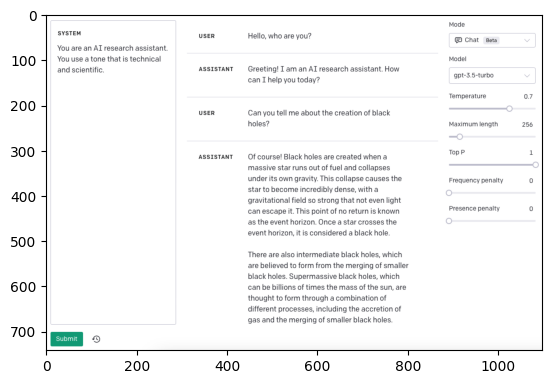

In [50]:
from matplotlib import image, pyplot

image_file = png_files[6]

pyplot.imshow(image.imread(image_file))
pyplot.show()

In [51]:
import base64

def encode_image(path):
    with open(path, "rb") as file:
        return base64.b64encode(file.read()).decode('utf-8')

img = encode_image(image_file)
img[:1000]

'iVBORw0KGgoAAAANSUhEUgAABEoAAALmCAYAAABVSHFPAAABWGlDQ1BJQ0MgUHJvZmlsZQAAKJF1kL9LQmEUhh9TEUIqMKKhwaEhwqI0qC3UoaIG0YJqu15NA39crorZHE0RCBFNERgEzVFLQzQFtQURRXN/QOBScjtXK7XowMt5eHn5ON8LHTZF01I2IJ3J6+GZgHt5ZdXteMWKhT5c2BU1p/lDoQWJ8L3bp/ogWZn7EfMtTzFyUti8Hd+/23WFDy5P/+bbpjMWz6myP0TDqqbnwTIkHCrmNZM3hHt1OUp4x+REg49Mjjb4rJ5ZDAeFb4R71KQSE34U9kRb/EQLp1MF9esG83pnPLMUkd0lGmCeAF4mRbPIj//JTtSzQbJolNBZJ0GSPG784mikiAvPkUFlFI+wlzGRz+z4d3dNL3sMU1WwlptedA8utqH/qekNHkL3Fpxfa4qu/DRqqdpyaz5vg53TYH8xjDfp1FGGWtkw3iuGUavI+89wVfoEBGtizG9Z44kAAABWZVhJZk1NACoAAAAIAAGHaQAEAAAAAQAAABoAAAAAAAOShgAHAAAAEgAAAESgAgAEAAAAAQAABEqgAwAEAAAAAQAAAuYAAAAAQVNDSUkAAABTY3JlZW5zaG90EwvMdQAAAddpVFh0WE1MOmNvbS5hZG9iZS54bXAAAAAAADx4OnhtcG1ldGEgeG1sbnM6eD0iYWRvYmU6bnM6bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDYuMC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9IiIKICAgICAgICAgICAgeG1sbnM6ZXhpZj0iaHR0cDovL25zLmFkb2JlLmNvbS9leGlmLzEuMC8iPgogICAgICAgICA

In [ ]:
## LLaVA
prompt = "describe the image"
res = ollama.generate(model="llava", prompt=prompt, images=[img])["response"]
print(res)

In [69]:
import chromadb 

db = chromadb.PersistentClient(path="./chroma")
db.list_collections()

['promptGuide', 'promptGeneration']

In [62]:
collection_name = "promptGuide"

# if collection_name in [c.name for c in db.list_collections()]:
#     db.delete_collection(collection_name)
#     print("--- deleted ---")

collection = db.get_or_create_collection(name=collection_name, 
                                         embedding_function=chromadb.utils.embedding_functions.DefaultEmbeddingFunction())

for chunk in tqdm(all_chunks, desc="Indexing Chunks in ChromaDB"):
    metadata = {
        "source": chunk["source"],
        "chunk_id": chunk["chunk_id"],
        "keywords": chunk["keywords"],  
    }
    doc_id = f"{chunk['source']}_chunk_{chunk['chunk_id']}"

    collection.add(
        documents=[chunk["text"]],
        metadatas=[metadata],
        ids=[doc_id],
        embeddings=None
    )

collection.peek(1)

C:\Users\GLOBAL\.cache\chroma\onnx_models\all-MiniLM-L6-v2\onnx.tar.gz: 100%|██████████| 79.3M/79.3M [00:18<00:00, 4.39MiB/s]
Indexing Chunks in ChromaDB:  51%|█████     | 1076/2107 [01:14<01:11, 14.35it/s]


KeyError: 'keywords'

In [63]:
collection.peek(1)

{'ids': ['image_0.png_chunk_0'],
 'embeddings': array([[ 4.65864874e-03,  4.39735092e-02,  3.64810154e-02,
         -1.36470143e-02, -5.75343743e-02,  3.08324806e-02,
          1.46605268e-01,  1.08925119e-01,  4.87322062e-02,
          6.32173121e-02, -2.44176108e-02, -1.20898470e-01,
          5.34357764e-02, -6.60918877e-02, -7.66006252e-03,
          1.15942927e-02,  3.38004753e-02, -5.42853512e-02,
         -8.52695033e-02, -4.29148041e-02,  2.40796451e-02,
         -3.36764045e-02,  6.26487136e-02, -5.96028194e-02,
          5.20901717e-02, -3.19870263e-02, -1.03514344e-02,
          3.45933139e-02, -3.17640454e-02, -1.02190860e-01,
         -4.42129523e-02,  4.62560244e-02,  1.29873864e-02,
         -1.90204326e-02,  2.08214838e-02, -4.74825222e-03,
         -3.71829458e-02, -8.82819481e-03,  3.09614372e-02,
          3.74012329e-02, -1.02239922e-02, -3.66615467e-02,
          1.68796889e-02, -2.28188070e-03,  1.35961510e-02,
          1.14318561e-02, -7.69631639e-02, -2.4495286

LLM Chat

In [64]:
query = "how to craft effective prompts for LLMs?"
collection.query(query_texts=[query])

{'ids': [['markdown_408.md_chunk_0',
   'markdown_96.md_chunk_5',
   'image_73.png_chunk_0',
   'markdown_23.md_chunk_0',
   'markdown_298.md_chunk_0',
   'markdown_4.md_chunk_0',
   'markdown_182.md_chunk_0',
   'markdown_7.md_chunk_0',
   'markdown_193.md_chunk_0',
   'markdown_33.md_chunk_1']],
 'embeddings': None,
 'documents': [['## Crafting Effective Prompts for LLMs <iframe width="100%" height="415px" src="https://www.youtube.com/embed/8KNKjBBm1Kw?si=puEJrGFe9XSu8O-A" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowFullScreen /> Large Language Models (LLMs) offer immense power for various tasks, but their effectiveness hinges on the quality of the prompts. This blog post summarize important aspects of designing effective prompts to maximize LLM performance. ### Key Considerations for Prompt Design **Specificity and Clarity:** Just like giving instructions to a human, prompts should clearly articulate the desired outcome. Ambi

In [65]:
res_db = collection.query(query_texts=[query])["documents"][0][0:10]
context = ' '.join(res_db).replace("\n", " ")
context

'## Crafting Effective Prompts for LLMs <iframe width="100%" height="415px" src="https://www.youtube.com/embed/8KNKjBBm1Kw?si=puEJrGFe9XSu8O-A" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowFullScreen /> Large Language Models (LLMs) offer immense power for various tasks, but their effectiveness hinges on the quality of the prompts. This blog post summarize important aspects of designing effective prompts to maximize LLM performance. ### Key Considerations for Prompt Design **Specificity and Clarity:** Just like giving instructions to a human, prompts should clearly articulate the desired outcome. Ambiguity can lead to unexpected or irrelevant outputs. **Structured Inputs and Outputs:** Structuring inputs using formats like JSON or XML can significantly enhance an LLM\'s ability to understand and process information. Similarly, specifying the desired output format (e.g., a list, paragraph, or code snippet) improves response relevan

In [66]:
# Chat with Context only
res = ollama.chat(model="llama3.2", 
                  messages=[{"role":"system", "content":"Give the most accurate answer using only \
                                                         the folling information: \n"+context},
                            {"role":"user", "content":query}])
print(res["message"]["content"])

Crafting effective prompts for Large Language Models (LLMs) involves understanding the capabilities and limitations of these models, as well as the task at hand. Here are some tips to help you create effective prompts:

1. **Clearly define the task**: Before crafting a prompt, clearly define the task or question you want the LLM to answer. Be specific about what you're looking for, whether it's a summary, an explanation, or a solution.
2. **Use simple and concise language**: Avoid using complex sentences or jargon that may confuse the model. Use simple and concise language to help the model understand your request.
3. **Provide context**: Give the model enough context to understand the topic or subject matter you're referring to. This can include relevant background information, definitions, or examples.
4. **Specify the format**: Indicate the desired output format, such as a summary, an answer, or a list of options.
5. **Use clear and specific keywords**: Use specific keywords related

In [67]:
# Chat with knowledge + Context
res = ollama.chat(model="llama3.2", 
                  messages=[{"role":"system", "content":"Give the most accurate answer using your knowledge \
                                                         and the folling additional information: \n"+context},
                            {"role":"user", "content":query}])
print(res["message"]["content"])

Crafting effective prompts for Large Language Models (LLMs) is crucial to elicit the desired responses and get the most out of these AI tools. Here are some tips to help you craft effective prompts:

1. **Clear and specific goals**: Define what you want to achieve with your prompt, whether it's generating text, answering questions, or completing a task.
2. **Concise language**: Use simple, straightforward language that is easy for the model to understand. Avoid ambiguity, jargon, and overly complex sentences.
3. **Contextualization**: Provide enough context for the model to understand the topic, scope, and boundaries of the prompt. This includes relevant background information, definitions, and rules.
4. **Specificity**: Be specific about what you want the model to generate or respond with. Avoid vague or open-ended prompts that may lead to irrelevant responses.
5. **Relevance**: Ensure that the prompt is relevant to the task at hand. If the prompt is unrelated to the task, the model m

In [68]:
# Chat Stream
res = ollama.chat(model="llama3.2", 
                  messages=[{"role":"system", "content":"Give the most accurate answer using your knowledge \
                                                         and the folling additional information: \n"+context},
                            {"role":"user", "content":query}],
                  stream=True)
for chunk in res:
    print(chunk["message"]["content"], end="")

Crafting effective prompts for Large Language Models (LLMs) is crucial to obtain accurate and relevant responses. Here are some tips to help you create effective prompts:

1. **Clearly define the task**: Clearly state what you want the model to do, such as answering a question, providing information on a specific topic, or generating text.
2. **Be specific**: Avoid vague or open-ended questions that may lead to ambiguous responses. Provide enough context and details to help the model understand what you're asking for.
3. **Use natural language**: Write your prompt in a way that sounds like natural language. Avoid using overly formal or technical jargon that may confuse the model.
4. **Specify requirements**: If there are any specific formatting, tone, or style requirements, make sure to include them in the prompt.
5. **Provide context**: Give the model enough background information to understand the topic and provide relevant responses.
6. **Use relevant keywords**: Include relevant ke